# Contents

Import Libraries

Step 1: Import the dataset

Step 2: Addressing PII Data in the dataset

Step 3: Comparing customer behavior in different geographic areas
- Create a new column named 'region' based on the state column
- Determine whether there’s a difference in spending habits between the different U.S. regions
- Visualization to compare customer behavior in different geographic areas

Step 4: Create an exclusion flag for low-activity customers 

Step 5: Create profiling variables
- 5.1: Profiling variable for the column 'age'
- 5.2: Profiling variable for the column 'income'
- 5.3: Profiling variable for the column 'n_dependants'

Step 6: Create appropriate visualizations to show the distribution of profiles- 	6.1 Visualization of age_grou
- 6.2 Visualization of income_group
- 6.3 Visualization of dependants_flagp

Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
- 7.1: Descriptive statistics of usage frequency and expenditure based on age groups
- 7.2: Descriptive statistics of usage frequency and expenditure based on income groups
- 7.3: Descriptive statistics of usage frequency and expenditure based on family dependancy.

Step 8: Compare your customer profiles with regions and departments
- 8.1: Comparing customer profiles with Regions
    - 8.1.1: Age_group Vs Regions    - 	8.1.2: Income_group Vs Region
    - 8.1.3: Dependants Vs Regions ns

## Import Libraries

In [1]:
# import the required libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Step 1: Import the data set 

In [2]:
# create a path variable
path = r'C:\Users\Sreelakshmi\Desktop\Instacart Basket Analysis'

# import the file orders_products_customer_combined.pkl into the data frame
df_ords_prods_cust = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'orders_products_customer_combined.pkl'))

In [3]:
df_ords_prods_cust.head()

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,n_dependants,family_status,income,check
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2539329,1,1,2,8,7.0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,2539329,1,1,2,8,7.0,12427,3,0,Original Beef Jerky,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2539329,1,1,2,8,7.0,26088,4,0,Aged White Cheddar Popcorn,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,2539329,1,1,2,8,7.0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


## Step 2: Addressing PII Data in the dataset

#### Answer: 
#### As values in the first_name and surname can be traced back to a particular person, it is clearly evident that PII (personally identifiable information) is present in the dataset. To address this situation, we need to remove these columns as these are sensitive information and for our current analysis these values are not required.

In [4]:
# dropping the columns first_name and surname from the dataframe
df_ords_prods_cust = df_ords_prods_cust.drop(columns = ['first_name', 'surname'])

In [5]:
# checking the columns in the dataframe
df_ords_prods_cust.columns

Index(['order_id', 'user_id', 'order_number', 'order_days_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spending_flag', 'day_prior_order_median', 'order_frequency_flag',
       'gender', 'state', 'age', 'n_dependants', 'family_status', 'income',
       'check'],
      dtype='object')

## Step 3: Comparing customer behavior in different geographic areas

#### a) Create a new column named 'region' based on the state column

In [6]:
# create the list of 4 regions
Northeast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']
Midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
South = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
West = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [7]:
# deriving the column 'region' with loc()
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(Northeast),'region'] = 'Northeast'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(Midwest),'region'] = 'Midwest'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(South),'region'] = 'South'
df_ords_prods_cust.loc[df_ords_prods_cust['state'].isin(West),'region'] = 'West'

# displaying the contents of the column region
df_ords_prods_cust['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

#### b) Determine whether there’s a difference in spending habits between the different U.S. regions

In [8]:
# using crosstabs to check the spending habits between the different US Regions
crosstab = pd.crosstab(df_ords_prods_cust['region'], df_ords_prods_cust['spending_flag'], dropna = False)
crosstab

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209676,10582209
West,160354,8132559


#### Answer:
#### From the above cross tab we can infer that, the highest and number of High spender and Low spender are from South region. Northeast is having least number of High Spender and Low spenders compared to other regions

##### High Spender: South > West > Midwest > Northeast
##### Low Spender:  South > West > Midwest > Northeast


#### c) Visualization to compare customer behavior in different geographic areas

In [9]:
print(plt.style.available)
plt.style.use('seaborn-v0_8-dark-palette')


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


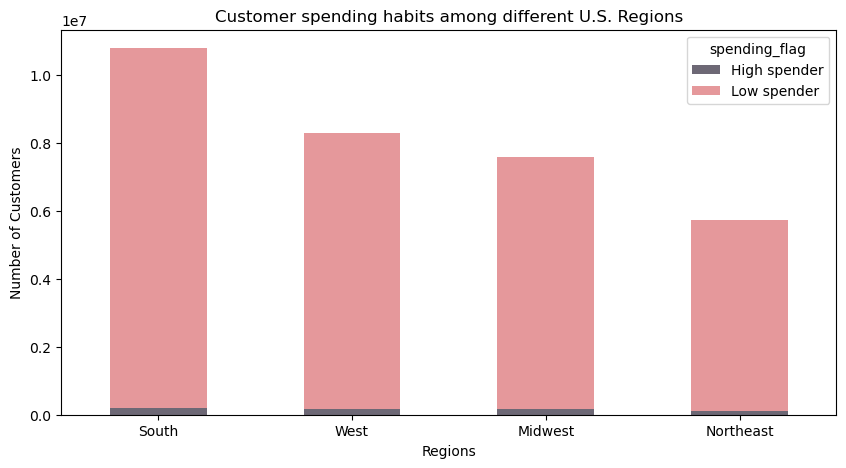

In [10]:
crosstab = crosstab.sort_values(['High spender'], ascending=False)

mycolors = ['#6d6875','#e5989b']
#create a stacked bar chart
bar_cust_spending_region = crosstab.plot(kind = 'bar', stacked = True, title = 'Customer spending habits among different U.S. Regions', xlabel = 'Regions', ylabel = 'Number of Customers', color = mycolors, figsize = (10,5))
# rotating the xlabel for readability
plt.xticks(rotation=360, ha='center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'ordering_and_region.png')) # Save
plt.show()

## Step 4: Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data

In [11]:
# create a new column named 'exclusion flag'  and exclude the customers if max_order < 5
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] < 5, 'exclusion_flag'] = True

# include the customers of max_order >= 5
df_ords_prods_cust.loc[df_ords_prods_cust['max_order'] >= 5, 'exclusion_flag'] = False
df_ords_prods_cust['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
False    30964564
True      1440295
Name: count, dtype: int64

In [12]:
#create a new dataframe which contains only customers with an exclusion_flag = 1
df_insta_new = df_ords_prods_cust[df_ords_prods_cust['exclusion_flag'] == False]

In [13]:
# checking the number of records after removing the customers who are not active
df_insta_new.shape

(30964564, 32)

In [14]:
#export the new sample to a pickle file
df_insta_new.to_pickle(os.path.join(path, 'Data', 'Prepared Data', 'instacart_sample.pkl'))

## Step 5: Create profiling variables

#### 5.1: Profiling variable for the column 'age'

In [15]:
# create a new column named 'age_group' based on the values in the column 'age'
df_insta_new.loc[df_insta_new['age'] < 30, 'age_group'] = 'Young Adults'
df_insta_new.loc[(df_insta_new['age'] >= 30) & (df_insta_new['age'] < 65), 'age_group'] = 'Adults'
df_insta_new.loc[df_insta_new['age'] >= 65, 'age_group'] = 'Elderly'

#checking the frequency of the newly created column 'age_group'
df_insta_new['age_group'].value_counts(dropna = False)

C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_15740\4102634007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insta_new.loc[df_insta_new['age'] < 30, 'age_group'] = 'Young Adults'


age_group
Adults          16951417
Elderly          8195544
Young Adults     5817603
Name: count, dtype: int64

#### 5.2: Profiling variable for the column 'income'

In [16]:
df_insta_new['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [17]:
# create a new column named 'income_group' based on the values in the column 'income'
df_insta_new.loc[df_insta_new['income'] < 50000, 'income_group'] = 'Low'
df_insta_new.loc[(df_insta_new['income'] >= 50000) & (df_insta_new['income'] < 100000), 'income_group'] = 'Medium'
df_insta_new.loc[df_insta_new['income'] >= 100000, 'income_group'] = 'High'

#checking the frequency of the newly created column 'age_group'
df_insta_new['income_group'].value_counts(dropna = False)

C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_15740\2213306454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insta_new.loc[df_insta_new['income'] < 50000, 'income_group'] = 'Low'


income_group
High      14207402
Medium    13394608
Low        3362554
Name: count, dtype: int64

#### 5.3: Profiling variable for the column 'n_dependants'

In [18]:
df_insta_new['n_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: n_dependants, dtype: float64

In [19]:
# create a new column named 'dependants_flag' based on the values in the column 'n_dependants'
df_insta_new.loc[df_insta_new['n_dependants'] == 0, 'dependants_flag'] = 'No dependants'
df_insta_new.loc[df_insta_new['n_dependants'] > 0, 'dependants_flag'] = 'Has dependants'

#checking the frequency of the newly created column 'age_group'
df_insta_new['dependants_flag'].value_counts(dropna = False)

C:\Users\Sreelakshmi\AppData\Local\Temp\ipykernel_15740\4078114858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insta_new.loc[df_insta_new['n_dependants'] == 0, 'dependants_flag'] = 'No dependants'


dependants_flag
Has dependants    23224883
No dependants      7739681
Name: count, dtype: int64

## Step 6: Create appropriate visualizations to show the distribution of profiles

In [20]:
# create a sample dataframe which contains only the required columns for visualization

df_sample_visual = df_insta_new[['age_group', 'income_group', 'dependants_flag', 'region']]
df_sample_visual.head()

,age_group,income_group,dependants_flag,region
0,Adults,Low,Has dependants,South
1,Adults,Low,Has dependants,South
2,Adults,Low,Has dependants,South
3,Adults,Low,Has dependants,South
4,Adults,Low,Has dependants,South


#### 6.1 Visualization of age_group

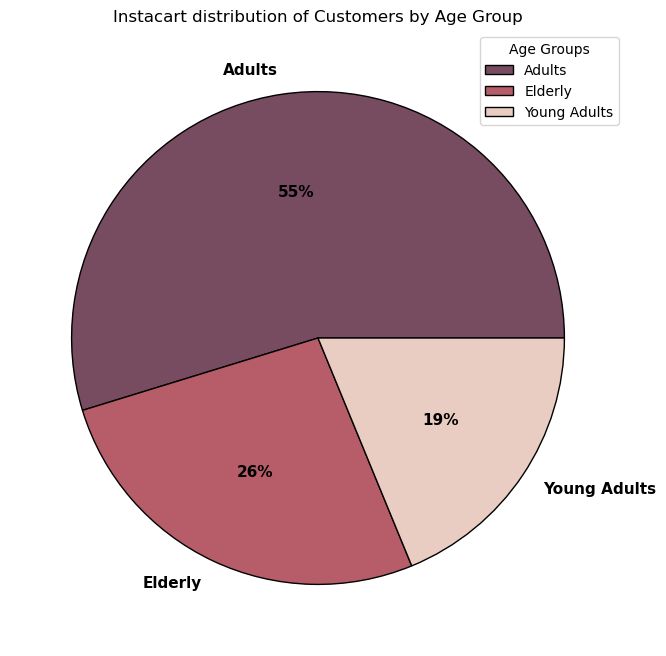

In [21]:
#create age_groups
age_group_counts = df_sample_visual['age_group'].value_counts()
mycolors = ["#774c60", "#b75d69", "#eacdc2"]

#Pie Chart
plt.figure(figsize = (10,8))
plt.pie(age_group_counts, #data
        labels = age_group_counts.index, #labels
        colors = mycolors, #colors
        autopct = '%.0f%%', # text labels
        textprops=dict(color='k', weight='bold', fontsize=11), #text properties
        wedgeprops = {'edgecolor' : 'black'} # boarders
       )
plt.title('Instacart distribution of Customers by Age Group') # title
plt.legend(title = 'Age Groups') # legends
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customers_age_groups_pie_chart.png')) # Save
plt.show()

#### 6.2 Visualization of income_group

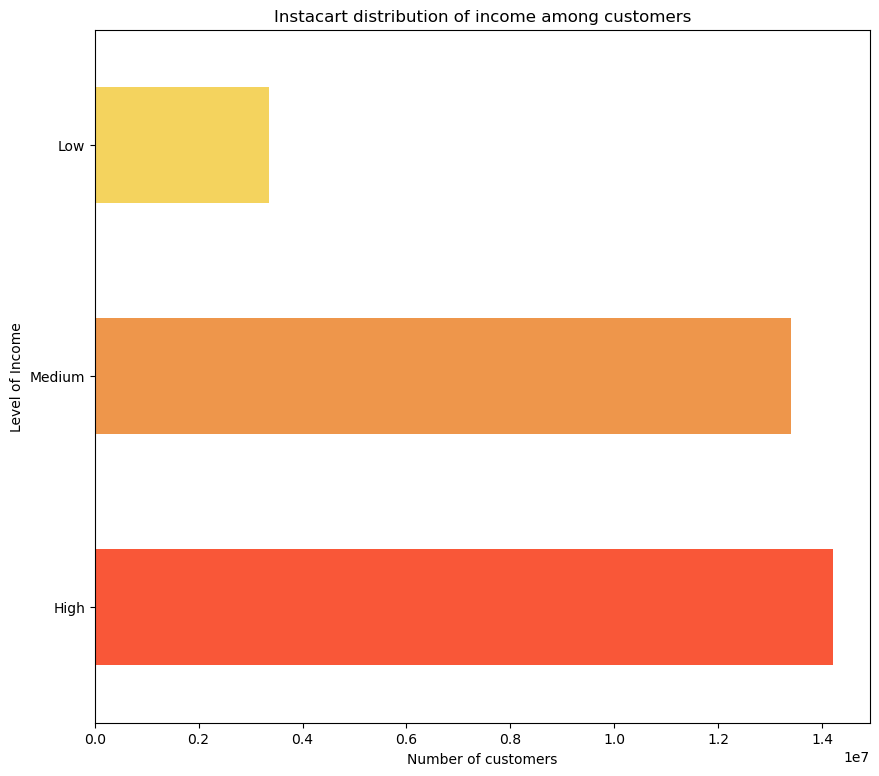

In [62]:
# create a bar chart to visualize only the column income group
Income_bar_chart = df_sample_visual['income_group'].value_counts().plot.barh(xlabel = 'Number of customers', ylabel = 'Level of Income', title = 'Instacart distribution of income among customers', figsize = (10,9), color = ['#f95738', '#ee964b', '#f4d35e'])

# saving the bar chart
Income_bar_chart.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'income_distribution_bar_chart.png'))

#### 6.3 Visualization of dependants_flag

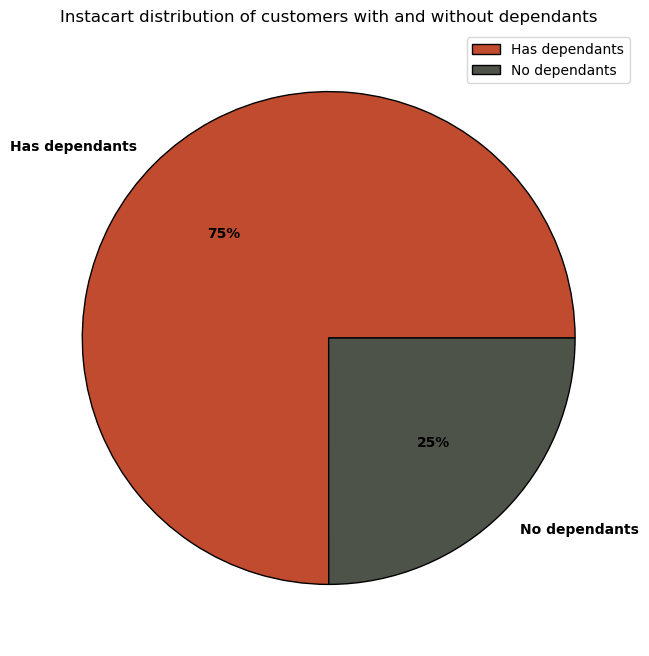

In [23]:
#create dependents frewuency distribution
dependant_flag_counts = df_sample_visual['dependants_flag'].value_counts()

#pie chart
mycolors = ["#c04b2f", "#4e5349"]

plt.figure(figsize = (10,8))
plt.pie(dependant_flag_counts,#data
        labels = dependant_flag_counts.index,
        colors = mycolors,
        autopct = '%.0f%%', # text labels
        textprops=dict(color='k', weight='bold', fontsize=10), #text properties
        wedgeprops = {'edgecolor' : 'black'} # boarders
       )

plt.title('Instacart distribution of customers with and without dependants') # title
plt.legend()
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'customers_dependants_pie_chart.png')) # Save
plt.show()

## Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [24]:
df_insta_new.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
order_days_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spending_flag               object
day_prior_order_median     float64
order_frequency_flag        object
gender                      object
state                       object
age                          int64
n_dependants                 int64
family_status               object
income              

In [25]:
df_insta_new['prices'].describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [26]:
max_value = df_insta_new['prices'].max()
max_value
df_max_prices = df_insta_new[df_insta_new['prices'] == 99999.0]
df_max_prices[['user_id', 'prices']]

,user_id,prices
128911,873,99999.0
128924,873,99999.0
284218,1893,99999.0
284229,1893,99999.0
284252,1893,99999.0
...,...,...
32079919,204099,99999.0
32079936,204099,99999.0
32125745,204395,99999.0
32255078,205227,99999.0


In [27]:
# find out the total expenditure for each user_id
df_new_subset = df_insta_new.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [28]:
# Rename 'prices' to 'order_total'
df_new_subset.rename(columns = {'prices' : 'total_expenditure'}, inplace = True)
# Check subset
df_new_subset

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,total_expenditure
0,1,Adults,Low,Has dependants,New customer,South,1,7.0,31.6
1,1,Adults,Low,Has dependants,New customer,South,2,15.0,35.4
2,1,Adults,Low,Has dependants,New customer,South,3,21.0,28.2
3,1,Adults,Low,Has dependants,New customer,South,4,29.0,26.0
4,1,Adults,Low,Has dependants,New customer,South,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3064370,206209,Elderly,High,Has dependants,Regular customer,Midwest,9,22.0,26.2
3064371,206209,Elderly,High,Has dependants,Regular customer,Midwest,10,29.0,64.7
3064372,206209,Elderly,High,Has dependants,Regular customer,Midwest,11,30.0,56.1
3064373,206209,Elderly,High,Has dependants,Regular customer,Midwest,12,18.0,131.5


### 7.1: Descriptive statistics of usage frequency and expenditure based on age groups

In [29]:
# max, min, mean by age category
aggregations_by_age_cat = df_new_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'total_expenditure' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  total_expenditure  \
                                min       mean   max               min   
age_group                                                                
Adults                          0.0  10.207296  30.0               1.0   
Elderly                         0.0  10.193160  30.0               1.0   
Young Adults                    0.0  10.220646  30.0               1.0   

                                    
                    mean       max  
age_group                           
Adults        120.543697  100452.9  
Elderly       118.277401  100330.2  
Young Adults  123.988244  100311.3

#### Note: The max value of total expenditure seems relative high. This needs to be checked.

In [30]:
# get the records which has prices above 50
df_high_prices = df_insta_new.loc[df_insta_new['prices'] > 50]
df_high_prices
df_high_prices.to_csv(os.path.join(path, 'Data', 'Original data', 'df_high_prices.csv'))

In [31]:
#It is found that 14900 and 99999 are the prices above 50. So correcting the price range
df_insta_new.loc[df_insta_new['prices'] == 14900, 'prices'] = 1.49
df_insta_new.loc[df_insta_new['prices'] == 99999, 'prices'] = 0.99
df_insta_new['prices'].describe()

count    3.096456e+07
mean     7.789587e+00
std      4.241015e+00
min      9.900000e-01
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

In [32]:
# find out the total expenditure for each user_id
df_new_subset = df_insta_new.groupby(['user_id', 'age_group', 'income_group', 'dependants_flag', 'loyalty_flag', 'region', 'order_number', 'days_since_prior_order'])['prices'].sum().reset_index()

In [33]:
# Rename 'prices' to 'order_total'
df_new_subset.rename(columns = {'prices' : 'total_expenditure'}, inplace = True)
# Check subset
df_new_subset

,user_id,age_group,income_group,dependants_flag,loyalty_flag,region,order_number,days_since_prior_order,total_expenditure
0,1,Adults,Low,Has dependants,New customer,South,1,7.0,31.6
1,1,Adults,Low,Has dependants,New customer,South,2,15.0,35.4
2,1,Adults,Low,Has dependants,New customer,South,3,21.0,28.2
3,1,Adults,Low,Has dependants,New customer,South,4,29.0,26.0
4,1,Adults,Low,Has dependants,New customer,South,5,28.0,57.0
...,...,...,...,...,...,...,...,...,...
3064370,206209,Elderly,High,Has dependants,Regular customer,Midwest,9,22.0,26.2
3064371,206209,Elderly,High,Has dependants,Regular customer,Midwest,10,29.0,64.7
3064372,206209,Elderly,High,Has dependants,Regular customer,Midwest,11,30.0,56.1
3064373,206209,Elderly,High,Has dependants,Regular customer,Midwest,12,18.0,131.5


In [34]:
# max, min, mean by age category
aggregations_by_age_cat = df_new_subset.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'total_expenditure' : ['min', 'mean', 'max']})
# Check
aggregations_by_age_cat

days_since_prior_order                  total_expenditure  \
                                min       mean   max               min   
age_group                                                                
Adults                          0.0  10.207296  30.0              0.99   
Elderly                         0.0  10.193160  30.0              0.99   
Young Adults                    0.0  10.220646  30.0              1.00   

                                 
                   mean     max  
age_group                        
Adults        78.723842  1092.2  
Elderly       78.421160   787.0  
Young Adults  79.087940   842.1

#### Answer: From the above data it is obvious that the average user_frequency and expenditure are more of less same among all age groups

### 7.2: Descriptive statistics of usage frequency and expenditure based on income groups

In [35]:
# max, min, mean by age category
aggregations_by_income_cat = df_new_subset.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'total_expenditure' : ['min', 'mean', 'max']})
# Check
aggregations_by_income_cat

days_since_prior_order                  total_expenditure  \
                                min       mean   max               min   
income_group                                                             
High                            0.0  10.091292  30.0              0.99   
Low                             0.0  10.831101  30.0              1.00   
Medium                          0.0  10.118111  30.0              0.99   

                                 
                   mean     max  
income_group                     
High          83.867538  1092.2  
Low           52.629435   875.0  
Medium        81.994847   852.5

#### Answer: Average expenditure of low income group is comparitivey smaller than medium and high income groups. User frequency pattern remains the same

### 7.3: Descriptive statistics of usage frequency and expenditure based on family dependancy. 

In [36]:
# max, min, mean by dependants category
aggregations_by_dependents_cat = df_new_subset.groupby('dependants_flag').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                               'total_expenditure' : ['min', 'mean', 'max']})
# Check
aggregations_by_dependents_cat

days_since_prior_order                  total_expenditure  \
                                   min       mean   max               min   
dependants_flag                                                             
Has dependants                     0.0  10.208390  30.0              0.99   
No dependants                      0.0  10.198976  30.0              0.99   

                                    
                      mean     max  
dependants_flag                     
Has dependants   78.776615  1092.2  
No dependants    78.516227   875.0

#### Answer: The expenditure and user frequency remains the same with people with or without dependants

## Step 8: Compare your customer profiles with regions and departments

### 8.1: Comparing customer profiles with Regions

#### 8.1.1: Age_group Vs Regions

In [37]:
# compare 'age_group' and 'region' using crosstab
ct_age_region = pd.crosstab(df_insta_new['region'], df_insta_new['age_group'], dropna = False)
ct_age_region

age_group,Adults,Elderly,Young Adults
region,,,
Midwest,4001629,1904046,1355838
Northeast,2955894,1484807,1023984
South,5642027,2708461,1960651
West,4351867,2098230,1477130


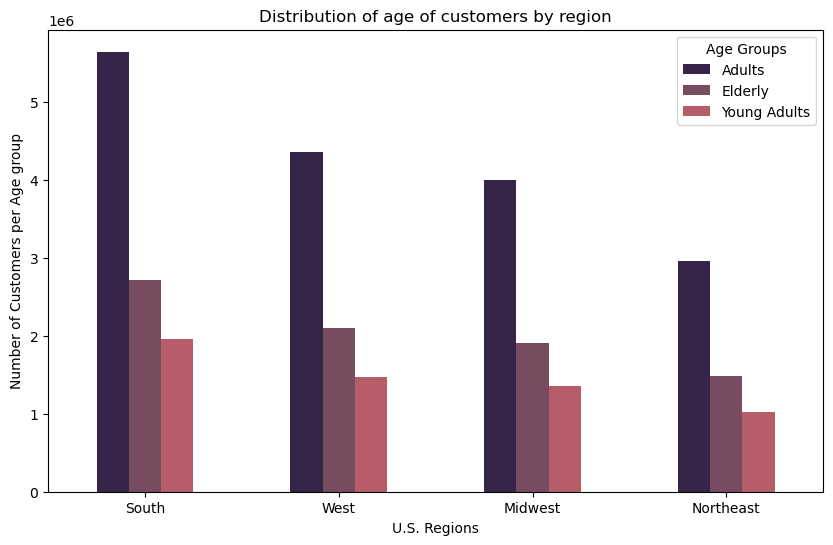

In [38]:
#plt.style.use('seaborn-v0_8-dark-palette')
ct_age_region = ct_age_region.sort_values(['Adults'], ascending=False)
mycolors = ["#372549", "#774c60", "#b75d69"]
ct_age_region.plot(kind='bar',  figsize=(10, 6), color = mycolors)
plt.title('Distribution of age of customers by region')
plt.xlabel('U.S. Regions')
plt.ylabel('Number of Customers per Age group')
plt.legend(title = 'Age Groups')
plt.xticks(rotation=360, ha='center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_age_region.png'))

#### 8.1.2: Income_group Vs Regions

In [39]:
# compare 'income_group' and 'region' using crosstab
ct_income_region = pd.crosstab(df_insta_new['region'], df_insta_new['income_group'], dropna = False)
ct_income_region

income_group,High,Low,Medium
region,,,
Midwest,3400093,783764,3077656
Northeast,2516484,587137,2361064
South,4663945,1142572,4504622
West,3626880,849081,3451266


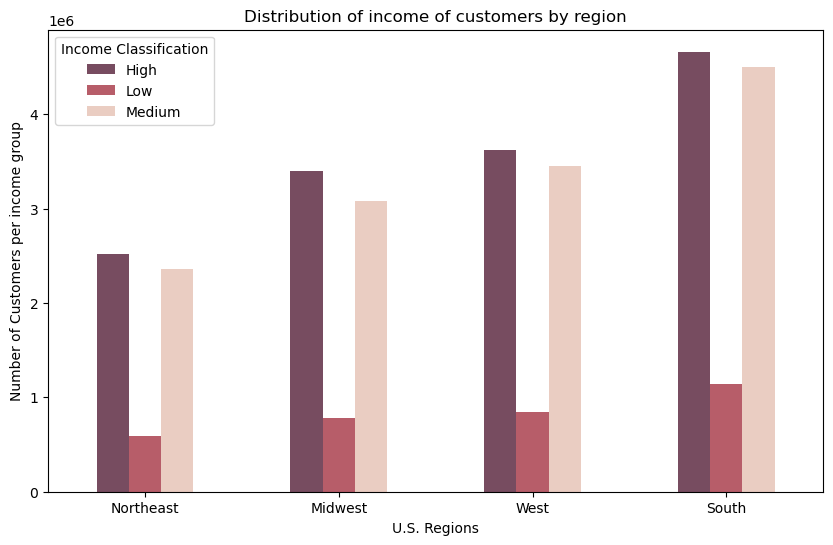

In [40]:
#plt.style.use('seaborn-v0_8-dark-palette')
ct_income_region = ct_income_region.sort_values(['High'], ascending=True)
mycolors = ["#774c60", "#b75d69", "#eacdc2"]
ct_income_region.plot(kind='bar', figsize=(10, 6), color = mycolors)
plt.title('Distribution of income of customers by region')
plt.xlabel('U.S. Regions')
plt.ylabel('Number of Customers per income group')
plt.legend(title = 'Income Classification')
plt.xticks(rotation=360, ha='center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_income_region.png'))

#### 8.1.3: Dependants Vs Regions

In [41]:
# compare 'dependants' and 'region' using crosstab
ct_dependants_region = pd.crosstab(df_insta_new['region'], df_insta_new['dependants_flag'], dropna = False)
ct_dependants_region

dependants_flag,Has dependants,No dependants
region,,
Midwest,5438697,1822816
Northeast,4110203,1354482
South,7729206,2581933
West,5946777,1980450


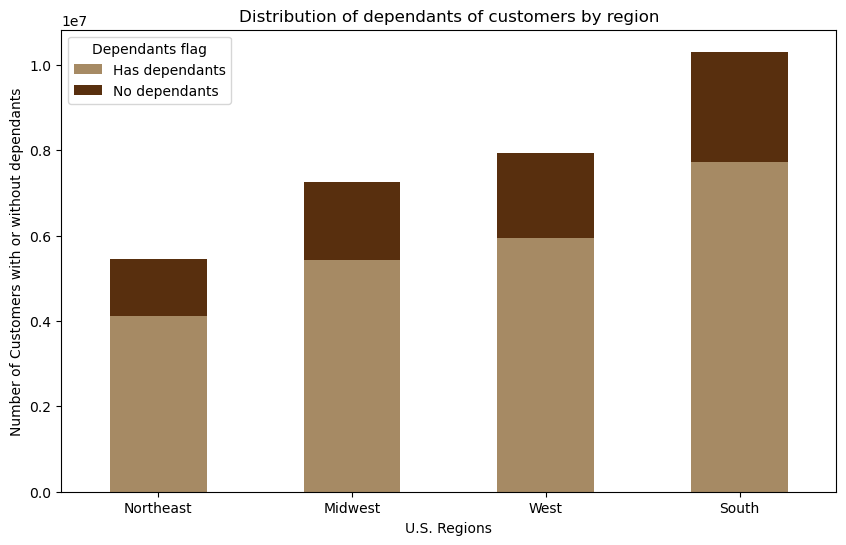

In [42]:
#plt.style.use('seaborn-v0_8-dark-palette')
ct_dependants_region = ct_dependants_region.sort_values(['Has dependants'], ascending=True)
mycolors = ["#a68a64", "#582f0e"]
ct_dependants_region.plot(kind='bar', stacked = True, figsize=(10, 6), color = mycolors)
plt.title('Distribution of dependants of customers by region')
plt.xlabel('U.S. Regions')
plt.ylabel('Number of Customers with or without dependants')
plt.legend(title = 'Dependants flag')
plt.xticks(rotation=360, ha='center')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_depend_region.png'))

### 8.2: Comparing customer profiles with departments

In [43]:
# import the file departments_wrangled.csv into the dataframe
df_dept = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)
# Rename the column Unnamed: 0 to department id
df_dept = df_dept.rename(columns = {'Unnamed: 0' : 'department_id' })
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


##### Profiling the column 'department'

In [44]:
# merge the dataframes df_insta_new and df_dept
df_final_instacart = df_insta_new.merge(df_dept, on = 'department_id', indicator = 'merge_dept')

In [45]:
#df_final_instacart[['user_id', 'order_number','age_group', 'income_group', 'dependants_flag', 'department_id','department','department_types']].head(10)

In [54]:
# create new categories of department
beverages = ['beverages', 'alcohol']
breakfast_foods = ['dairy eggs','breakfast']
pantry_foods = ['dry goods pasta', 'pantry','canned goods']
processed_foods = ['frozen','international','meat seafood','snacks', 'deli', 'bakery']
other_merchandise = ['other', 'pets', 'bulk', 'personal care', 'household', 'babies', 'missing']
produce = ['produce']

#classifying the contents of department into 3 sections
df_final_instacart.loc[df_final_instacart['department'].isin(beverages), 'department_types'] = 'Beverages'
df_final_instacart.loc[df_final_instacart['department'].isin(breakfast_foods), 'department_types'] = 'Breakfast'
df_final_instacart.loc[df_final_instacart['department'].isin(pantry_foods), 'department_types'] = 'Pantry'
df_final_instacart.loc[df_final_instacart['department'].isin(produce), 'department_types'] = 'Produce'
df_final_instacart.loc[df_final_instacart['department'].isin(processed_foods), 'department_types'] = 'Processed foods'
df_final_instacart.loc[df_final_instacart['department'].isin(other_merchandise), 'department_types'] = 'Others'
df_final_instacart['department_types'].value_counts(dropna = False)

department_types
Produce            9079273
Processed foods    7943571
Breakfast          5848032
Pantry             3616915
Beverages          2716528
Others             1760245
Name: count, dtype: int64

#### 8.2.1: Age group Vs Departments

In [55]:
# compare 'age_groups' and 'department_types' using crosstab
ct_age_dept = pd.crosstab(df_final_instacart['department_types'], df_final_instacart['age_group'], dropna = False)
ct_age_dept

age_group,Adults,Elderly,Young Adults
department_types,,,
Beverages,1490222,720713,505593
Breakfast,3200271,1543368,1104393
Others,964738,463807,331700
Pantry,1977457,957208,682250
Processed foods,4346991,2102344,1494236
Produce,4971738,2408104,1699431


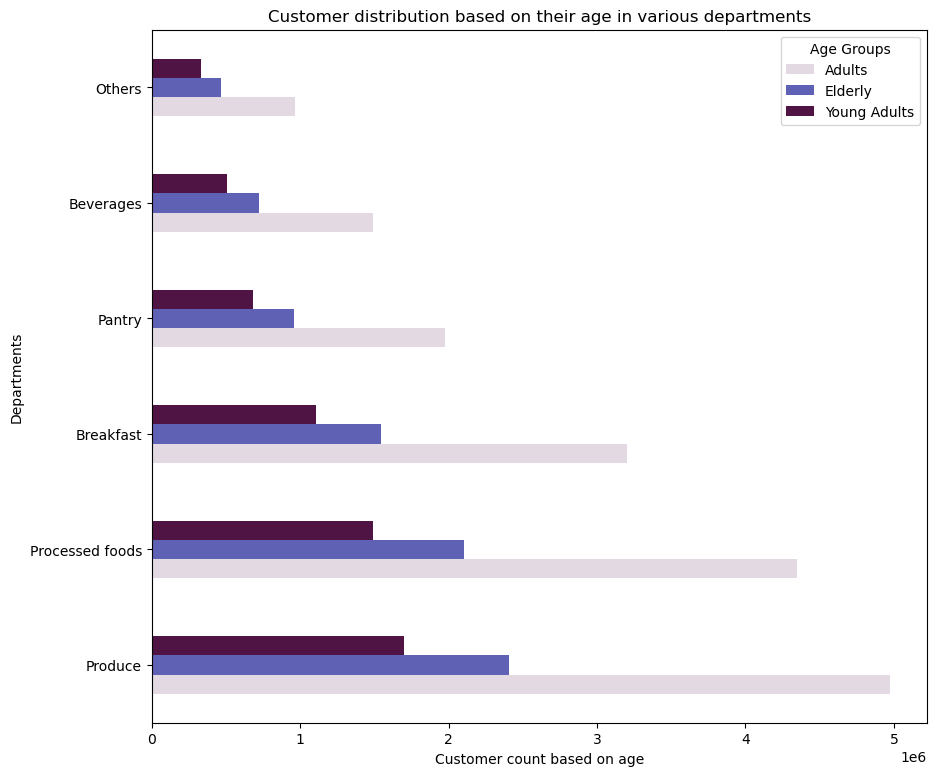

In [56]:
mycolors = plt.cm.twilight(np.linspace(0,2,8)) 
ct_age_dept = ct_age_dept.sort_values(['Adults'], ascending=False)
ct_age_dept.plot(kind = 'barh', color = mycolors, figsize = (10,9))
plt.title('Customer distribution based on their age in various departments')
plt.xlabel('Customer count based on age')
plt.ylabel('Departments')
plt.legend(title = 'Age Groups')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_dept_age.png'))

#### 8.2.2: Income Vs Departments

In [57]:
# compare 'income' and 'department' using crosstab
ct_income_dept = pd.crosstab(df_final_instacart['department_types'], df_final_instacart['income_group'], dropna = False)
ct_income_dept

income_group,High,Low,Medium
department_types,,,
Beverages,1195604,401168,1119756
Breakfast,2703807,593771,2550454
Others,814587,187959,757699
Pantry,1717948,309517,1589450
Processed foods,3538454,1043825,3361292
Produce,4237002,826314,4015957


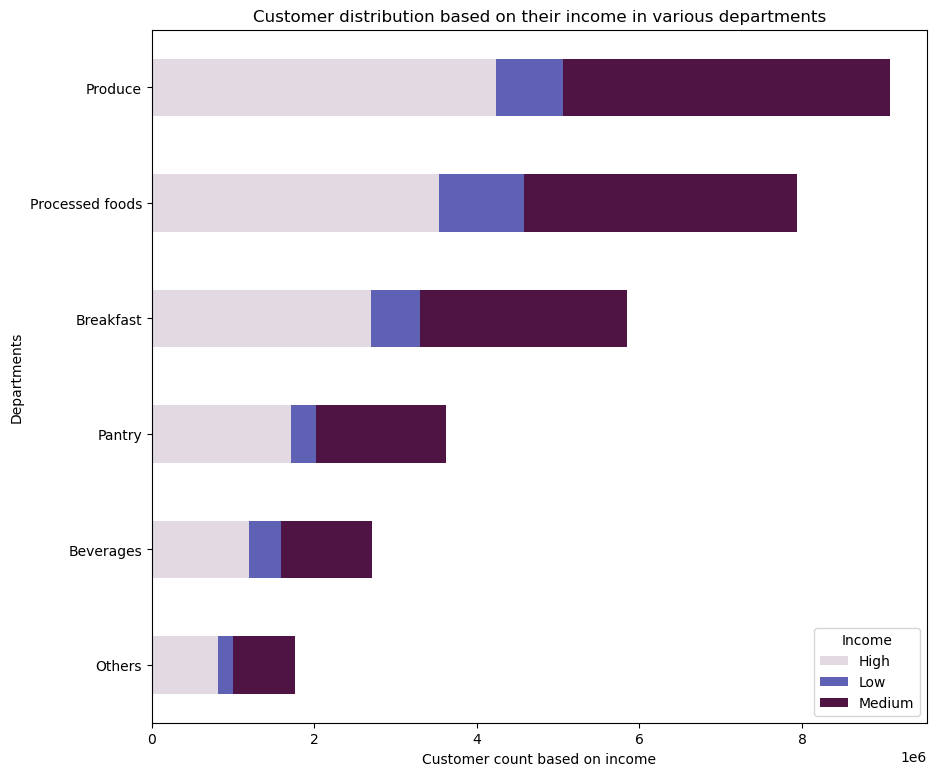

In [58]:
#plot the relationship in a bar chart
mycolors = plt.cm.twilight(np.linspace(0,2,8)) 
ct_income_dept = ct_income_dept.sort_values(['High'], ascending=True)
ct_income_dept.plot(kind = 'barh', stacked = True, color = mycolors, figsize = (10,9))
plt.title('Customer distribution based on their income in various departments')
plt.xlabel('Customer count based on income')
plt.ylabel('Departments')
plt.legend(title = 'Income')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_dept_income.png'))

#### 8.2.3: Dependants Vs Departments

In [59]:
# compare 'income' and 'department' using crosstab
ct_dependant_dept = pd.crosstab(df_final_instacart['department_types'], df_final_instacart['dependants_flag'], dropna = False)
ct_dependant_dept

dependants_flag,Has dependants,No dependants
department_types,,
Beverages,2034360,682168
Breakfast,4387224,1460808
Others,1323103,437142
Pantry,2717695,899220
Processed foods,5958669,1984902
Produce,6803832,2275441


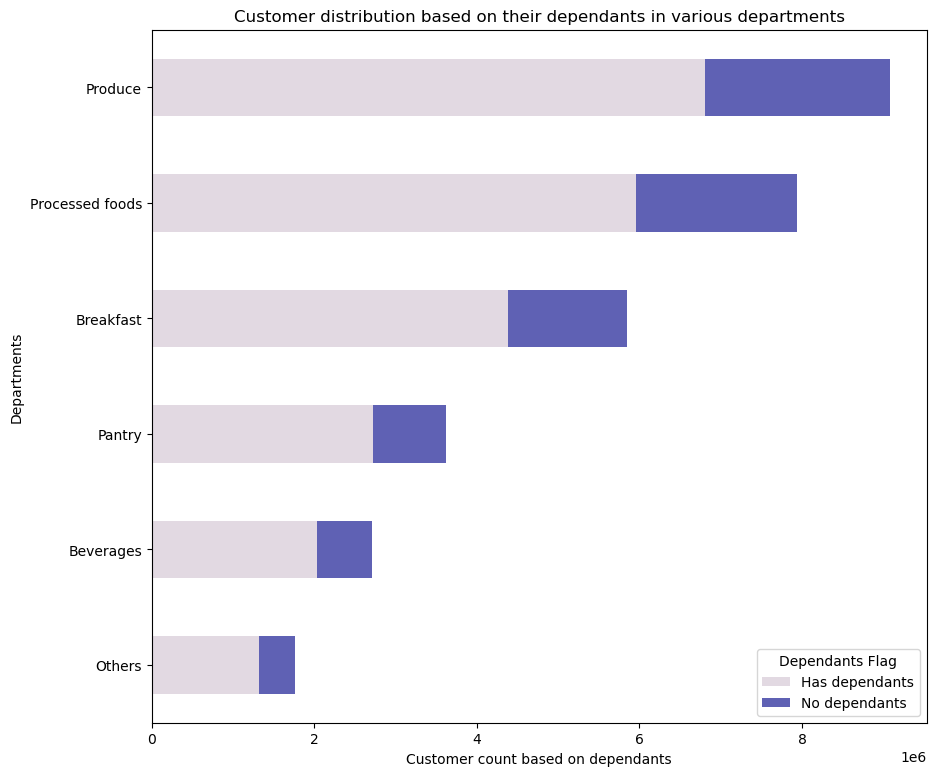

In [60]:
#plot the relationship in a bar chart
mycolors = plt.cm.twilight(np.linspace(0,2,8)) 
ct_dependant_dept = ct_dependant_dept.sort_values(['Has dependants'], ascending=True)
ct_dependant_dept.plot(kind = 'barh', stacked = True, color = mycolors, figsize = (10,9))
plt.title('Customer distribution based on their dependants in various departments')
plt.xlabel('Customer count based on dependants')
plt.ylabel('Departments')
plt.legend(title = 'Dependants Flag')
plt.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'bar_chart_dept_dependant.png'))

In [61]:
#export the final dataframe to a csv file
df_final_instacart.to_pickle(os.path.join(path, 'Data','Prepared Data', 'instacart_final_dataset.pkl'))